In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    number_1: int
    number_2: int
    number_3: int
    number_4: int
    operation_1: str
    operation_2: str
    final_number: int

def adder_1(state: AgentState) ->AgentState:
    """Add number_1 and number_2"""
    state["final_number"] = state["number_1"] + state["number_2"]
    return state
def subtractor_1(state: AgentState) -> AgentState:
    """Subtract number_1 and number_2"""
    state["final_number"] = state["number_1"] - state["number_2"]
    return state

def adder_2(state: AgentState) ->AgentState:
    """Add number_3 and number_4"""
    state["final_number"] = state["number_3"] + state["number_4"]
    return state
def subtractor_2(state: AgentState) -> AgentState:
    """Subtract number_3 and number_4"""
    state["final_number"] = state["number_3"] - state["number_4"]
    return state

def decide_next_node_1(state: AgentState) -> AgentState:
    """Decide Next state"""
    if state["operation_1"] == "+":
        return "addition_operation_1"
    elif state["operation_1"] =="-":
        return "subtraction_operation_1"
def decide_next_node_2(state: AgentState) -> AgentState:
    """Decide second operation"""
    if state["operation_2"] == "+":
        return "addition_operation_2"
    elif state["operation_2"] == "-":
        return "subtraction_operation_2"
    

In [19]:
graph = StateGraph(AgentState)
graph.add_node("add_node_1", adder_1)
graph.add_node("subtract_node_1", subtractor_1)
graph.add_node("router_1", lambda state: state)

graph.add_node("add_node_2", adder_2)
graph.add_node("subtract_node_2", subtractor_2)
graph.add_node("router_2", lambda state: state)

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1", decide_next_node_1,
    {
        "addition_operation_1": "add_node_1",
        "subtraction_operation_1": "subtract_node_1"
    }
)
graph.add_edge("add_node_1", "router_2")
graph.add_edge("subtract_node_1", "router_2")

graph.add_conditional_edges(
    "router_2", decide_next_node_2,
    {
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2"
    }
)
graph.add_edge("add_node_2", END)
graph.add_edge("subtract_node_2", END)
app = graph.compile()
               

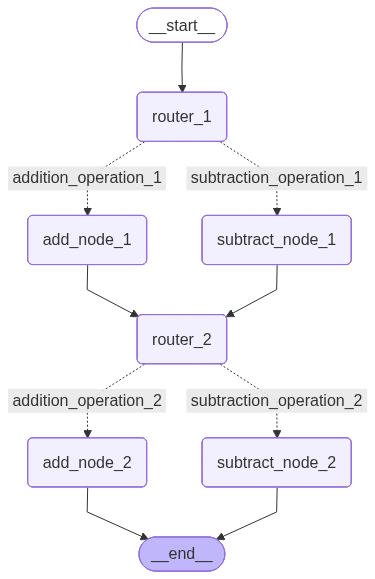

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
initial_state = {
    "number_1": 10,
    "number_2": 5,
    "number_3": 7,
    "number_4": 2,
    "operation_1": "-",
    "operation_2": "+"
}
updated_state = app.invoke(initial_state)
updated_state

{'number_1': 10,
 'number_2': 5,
 'number_3': 7,
 'number_4': 2,
 'operation_1': '-',
 'operation_2': '+',
 'final_number': 9}